In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
from collections import defaultdict
%matplotlib inline

In [33]:
data_p = '../../data/'
stop_words = set(stopwords.words('english'))

In [34]:
df = pd.read_csv(data_p + 'clean_messages.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.dropna()
df.index = range(len(df))
df.head()

,content,sender_name,timestamp_ms,type,date_time,year,month,day,hour,weekday
0,No it's okay,å¾å­è±ª,1459881221299,Generic,2016-04-05 11:33:41.299,2016,4,5,11,1
1,Kinda tied up right now..,å¾å­è±ª,1459881184462,Generic,2016-04-05 11:33:04.462,2016,4,5,11,1
2,ä½ ï¼ó°,å¾å­è±ª,1459881035831,Generic,2016-04-05 11:30:35.831,2016,4,5,11,1
3,I am sorry plz remind me,å¾å­è±ª,1459880971259,Generic,2016-04-05 11:29:31.259,2016,4,5,11,1
4,Do I know u?,å¾å­è±ª,1459880962687,Generic,2016-04-05 11:29:22.687,2016,4,5,11,1


In [35]:
# for col in ['year', 'month', 'day', 'hour', 'weekday']:
#     sns.countplot(df[col])
#     plt.title(col)
#     plt.show()

In [36]:
df.groupby('year').count()

,content,sender_name,timestamp_ms,type,date_time,month,day,hour,weekday
year,,,,,,,,,
2014,534,534,534,534,534,534,534,534,534
2015,1849,1849,1849,1849,1849,1849,1849,1849,1849
2016,5178,5178,5178,5178,5178,5178,5178,5178,5178
2017,6876,6876,6876,6876,6876,6876,6876,6876,6876
2018,7656,7656,7656,7656,7656,7656,7656,7656,7656


In [37]:
df['polarity'] = [TextBlob(s).sentiment.polarity for s in df['content']]
df['subjectivity'] = [TextBlob(s).sentiment.subjectivity for s in df['content']]
df['word_list'] = [TextBlob(s).words.lemmatize() for s in df['content']]
df['word_list'] = [[s for s in df.loc[j, 'word_list'] if s not in stop_words] for j in range(len(df))]
print(list(df))
df.head()

['content', 'sender_name', 'timestamp_ms', 'type', 'date_time', 'year', 'month', 'day', 'hour', 'weekday', 'polarity', 'subjectivity', 'word_list']


,content,sender_name,timestamp_ms,type,date_time,year,month,day,hour,weekday,polarity,subjectivity,word_list
0,No it's okay,å¾å­è±ª,1459881221299,Generic,2016-04-05 11:33:41.299,2016,4,5,11,1,0.500000,0.500000,"[No, 's, okay]"
1,Kinda tied up right now..,å¾å­è±ª,1459881184462,Generic,2016-04-05 11:33:04.462,2016,4,5,11,1,0.285714,0.535714,"[Kinda, tied, right]"
2,ä½ ï¼ó°,å¾å­è±ª,1459881035831,Generic,2016-04-05 11:30:35.831,2016,4,5,11,1,0.000000,0.000000,"[ä½, ï¼ó°]"
3,I am sorry plz remind me,å¾å­è±ª,1459880971259,Generic,2016-04-05 11:29:31.259,2016,4,5,11,1,-0.500000,1.000000,"[I, sorry, plz, remind]"
4,Do I know u?,å¾å­è±ª,1459880962687,Generic,2016-04-05 11:29:22.687,2016,4,5,11,1,0.000000,0.000000,"[Do, I, know, u]"


/Users/zihaoxu/ENTER/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


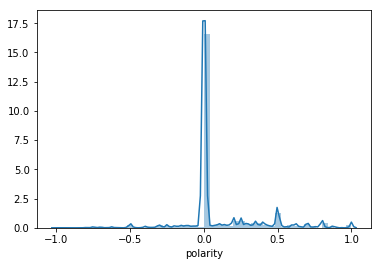

In [38]:
sns.distplot(df['polarity'])

In [39]:
top_names = list(df['sender_name'].value_counts().sort_values(ascending = False).index)[1:]

In [40]:
# word_freq = defaultdict(list)
# df['yr_mo'] = [str(y) + str(m) for y,m in zip(df['year'],df['month'])]

# for y in df['yr_mo'].unique():
#     temp = df[df['yr_mo'] == y]
#     all_words = []
#     for i in temp.index:
#         all_words += temp.loc[i, 'word_list']
#     word_freq['yr_mo'].append(y)
#     word_freq['words'].append(nltk.FreqDist(all_words).most_common(20))
# word_freq = pd.DataFrame(word_freq)

/Users/zihaoxu/ENTER/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


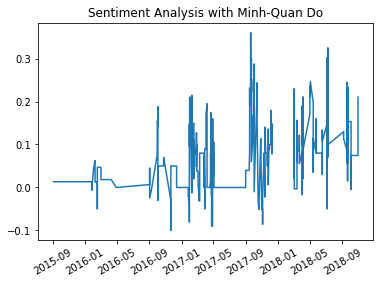

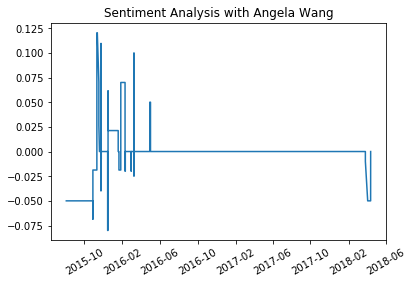

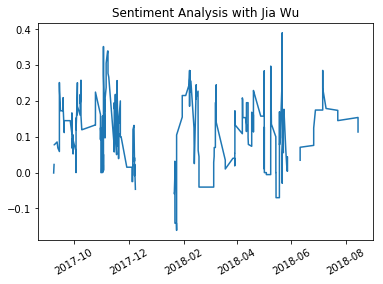

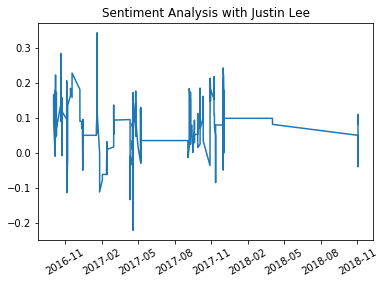

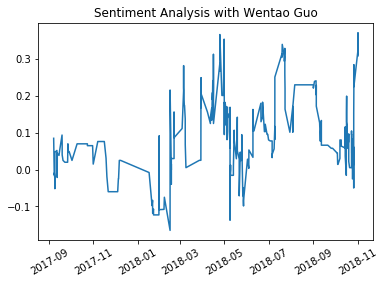

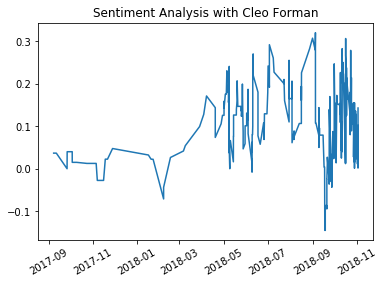

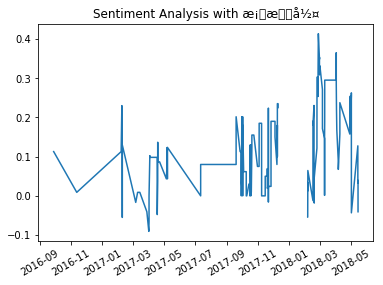

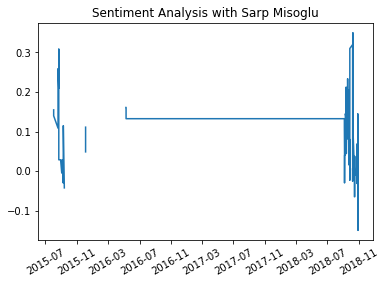

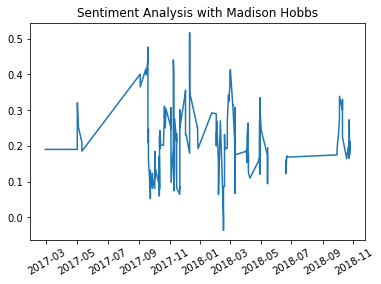

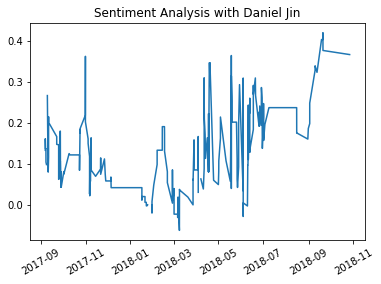

In [44]:
def plot_sentiment(name):
    c = df[df['sender_name'] == name]
    c['ma'] = c['polarity'].rolling(10).mean()
    c = c.sort_values('date_time')
    plt.plot(c['date_time'], c['ma'])
    plt.title('Sentiment Analysis with ' + str(name))
    plt.xticks(rotation = 30)
    plt.show()
    
for name in top_names[:10]:
    plot_sentiment(name)